In [1]:
from datetime import date
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import gamma

df = pd.read_csv("order_train1.csv", encoding="gbk")
df["order_date"]=df["order_date"].apply(pd.to_datetime,format='%Y-%m-%d')
# data.drop('order_date', axis=1, inplace=True)

df = df.set_index('order_date')
df_train = df[['sales_region_code', 'first_cate_code','second_cate_code','item_code','ord_qty']]
df_train

,sales_region_code,first_cate_code,second_cate_code,item_code,ord_qty
order_date,,,,,
2015-09-01,104,307,403,22069,19
2015-09-01,104,301,405,20028,12
2015-09-02,104,307,403,21183,109
2015-09-02,104,308,404,20448,3
2015-09-02,104,307,403,21565,3
...,...,...,...,...,...
2018-12-20,102,302,408,20994,59
2018-12-20,102,302,408,21875,502
2018-12-20,102,302,408,20215,106


In [2]:
pre = pd.read_csv("predict_sku1.csv", encoding="gbk")
## 查看预测数据
data_pre = pd.DataFrame(pre,columns=['sales_region_code', 'first_cate_code', 'second_cate_code','item_code'])
data_pre
# groupby(['sales_region_code'])['ord_qty'].sum().sort_values()

,sales_region_code,first_cate_code,second_cate_code,item_code
0,101,303,406,20002
1,101,301,405,20003
2,101,307,403,20006
3,101,303,401,20011
4,101,307,403,20014
...,...,...,...,...
2614,105,307,403,22066
2615,105,305,412,22072
2616,105,307,403,22075
2617,105,303,401,22083


In [3]:
data_pre. groupby(['item_code'])['sales_region_code'].count()

item_code
20002    4
20003    4
20004    1
20006    4
20008    1
        ..
22075    4
22081    3
22082    1
22083    2
22084    4
Name: sales_region_code, Length: 987, dtype: int64

In [4]:
data_pre.loc[data_pre['item_code'] == 20006]

,sales_region_code,first_cate_code,second_cate_code,item_code
2,101,307,403,20006
656,102,307,403,20006
1292,103,307,403,20006
1933,105,307,403,20006


In [3]:
df_train_20006 = df_train.loc[df_train['item_code'] == 20006]
df_train_20006

,sales_region_code,first_cate_code,second_cate_code,item_code,ord_qty
order_date,,,,,
2015-09-13,104,307,403,20006,15
2015-09-17,104,307,403,20006,17
2015-09-18,104,307,403,20006,14
2015-09-21,104,307,403,20006,10
2015-09-26,104,307,403,20006,36
...,...,...,...,...,...
2018-11-19,102,307,403,20006,79
2018-12-09,105,307,403,20006,10
2018-12-11,105,307,403,20006,7


In [4]:
df_train_20006_byday = df_train_20006.groupby([pd.Grouper(freq='D')])['ord_qty'].mean().reset_index()
df_train_20006_byday.set_index('order_date',inplace = True)

df_train_20006_byday=df_train_20006_byday.fillna(method='ffill')

df_train_20006_byday

,ord_qty
order_date,
2015-09-13,15.0
2015-09-14,15.0
2015-09-15,15.0
2015-09-16,15.0
2015-09-17,17.0
...,...
2018-12-12,7.0
2018-12-13,7.0
2018-12-14,7.0


<AxesSubplot: xlabel='order_date', ylabel='ord_qty'>

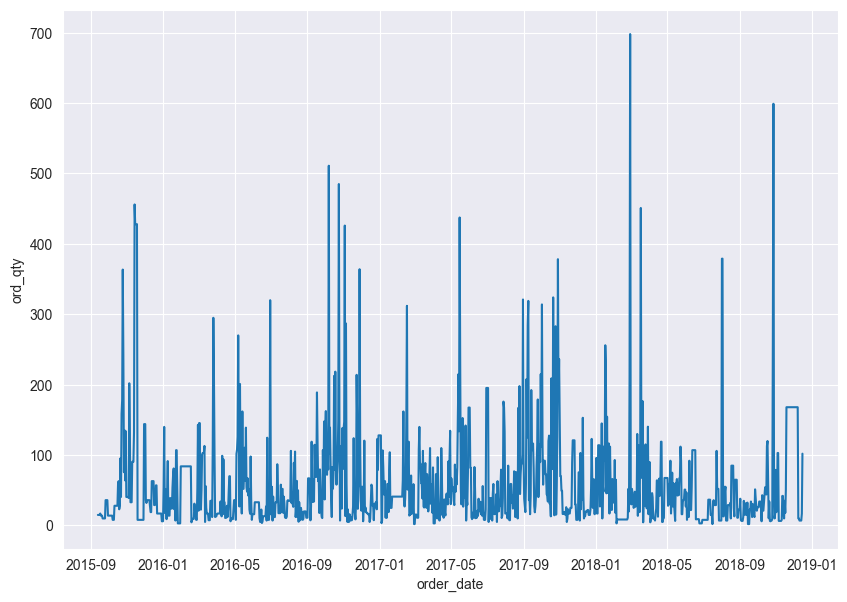

In [7]:
plt.figure(figsize=(10,7))
# plt.title("")
# plt.scatter(x=df_train_20006.index, y=df_train_20002['ord_qty'])
sns.lineplot(x='order_date', y='ord_qty',  data=df_train_20006_byday)

In [7]:
from sklearn.preprocessing import MinMaxScaler
values = df_train_20006_byday['ord_qty'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
train_size = int(len(scaled) * 0.9)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

1071 120


In [12]:
train

array([[0.01867816],
       [0.01867816],
       [0.01867816],
       ...,
       [0.04310345],
       [0.01149425],
       [0.11925288]], dtype=float32)

In [13]:
scaled

array([[0.01867816],
       [0.01867816],
       [0.01867816],
       ...,
       [0.00718391],
       [0.02155172],
       [0.14367816]], dtype=float32)

In [5]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

# def create_dataset(X, y, time_steps=1):
#     Xs, ys = [], []
#     for i in range(len(X) - time_steps):
#         v = X.iloc[i:(i + time_steps)].values
#         Xs.append(v)
#         ys.append(y.iloc[i + time_steps])
#     return np.array(Xs), np.array(ys)



# print(train_data.shape)
# print(test_data.shape)
 # Create the train and test datasets

look_back = 10
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

NameError: name 'train' is not defined

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

print(X_train.shape[0])
print(X_train.shape[1])
# print(X_train.shape[2])
# 指定 EarlyStopping 回调函数
early_stop = EarlyStopping(monitor='val_loss', patience=20)

model = tf.keras.Sequential([
                            tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.LSTM(32),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(1)
                        ])
 # Compile the model
model.compile(optimizer=Adam(0.001), loss='mse')
 # Train the model
history = model.fit(
    X_train, y_train,
    epochs=850,
    batch_size=32,
    validation_split=0.1,
    shuffle=False,
    callbacks=[early_stop]  # 添加 EarlyStopping 回调函数
)
y_pred = model.predict(X_test)

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('item_code_20006-日粒度预测')
plt.legend()
plt.show()

In [29]:
print(y_pred.shape)
print(y_test.shape)

(110, 1)
(110,)


In [30]:
y_pred = np.squeeze(y_pred)
y_pred.shape

(110,)

In [31]:
from keras.losses import mean_squared_error

# 将 y_pred 和 y_test 逆归一化
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# 计算 MSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
# print("MSE: ", mse)
tot_mse = tf.reduce_sum(mse)
avg_mse = tot_mse / mse.shape[0]
print('Test MSE: %.3f' % avg_mse)
# print(mse.shape[0])

Test MSE: 4043.200


In [33]:
df_30_days_past=df_train_20006_byday.iloc[-100:-90,:]
df_30_days_past

,ord_qty
order_date,
2018-09-08,35.0
2018-09-09,15.5
2018-09-10,15.5
2018-09-11,31.5
2018-09-12,15.5
2018-09-13,15.0
2018-09-14,32.5
2018-09-15,2.0
2018-09-16,2.0


In [34]:
## 首先计算一个样本item_code = 20011 这个商品未来三个月的销量预测

## 先构造预测数据集

data_pre_exm = data_pre.loc[data_pre['item_code'] == 20006][0:1]
data_pre_new = pd.DataFrame(np.repeat(data_pre_exm.values,101,axis=0))
data_pre_new.columns = data_pre_exm.columns
# data_pre_new = data_pre_new[['']]
data_pre_new["ord_qty"]=0
df_90_days_future=data_pre_new[["ord_qty"]]
df_90_days_future

,ord_qty
0,0
1,0
2,0
3,0
4,0
...,...
96,0
97,0
98,0
99,0


In [35]:
old_scaled_array=scaler.transform(df_30_days_past)
new_scaled_array=scaler.transform(df_90_days_future)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)
full_df

D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


,0
0,0.047414
1,0.019397
2,0.019397
3,0.042385
4,0.019397
...,...
106,NaN
107,NaN
108,NaN
109,NaN


In [36]:
full_df_scaled_array=full_df.values
all_data=[]
time_step=10
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(
    full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]].reshape(1,10))
    data_x=np.array(data_x)
    prediction=model.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

full_df

1/1 [==============================] - 0s 46ms/step


,0
0,0.047414
1,0.019397
2,0.019397
3,0.042385
4,0.019397
...,...
106,0.118659
107,0.118659
108,0.118659
109,0.118659


In [37]:
date = pd.date_range('2018-12-21', '2019-03-31',freq='D')
print(date)

DatetimeIndex(['2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30',
               ...
               '2019-03-22', '2019-03-23', '2019-03-24', '2019-03-25',
               '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29',
               '2019-03-30', '2019-03-31'],
              dtype='datetime64[ns]', length=101, freq='D')


In [38]:
# 添加未来要预测的3个月
future = pd.DataFrame(index=date, columns= df_train_20006_byday.columns)
future['ord_qty'] = np.rint(scaler.inverse_transform(full_df.values)[10::])
df_alldata = pd.concat([df_train_20006_byday, future])
df_alldata

,ord_qty
2015-09-13,15.0
2015-09-14,15.0
2015-09-15,15.0
2015-09-16,15.0
2015-09-17,17.0
...,...
2019-03-27,85.0
2019-03-28,85.0
2019-03-29,85.0
2019-03-30,85.0


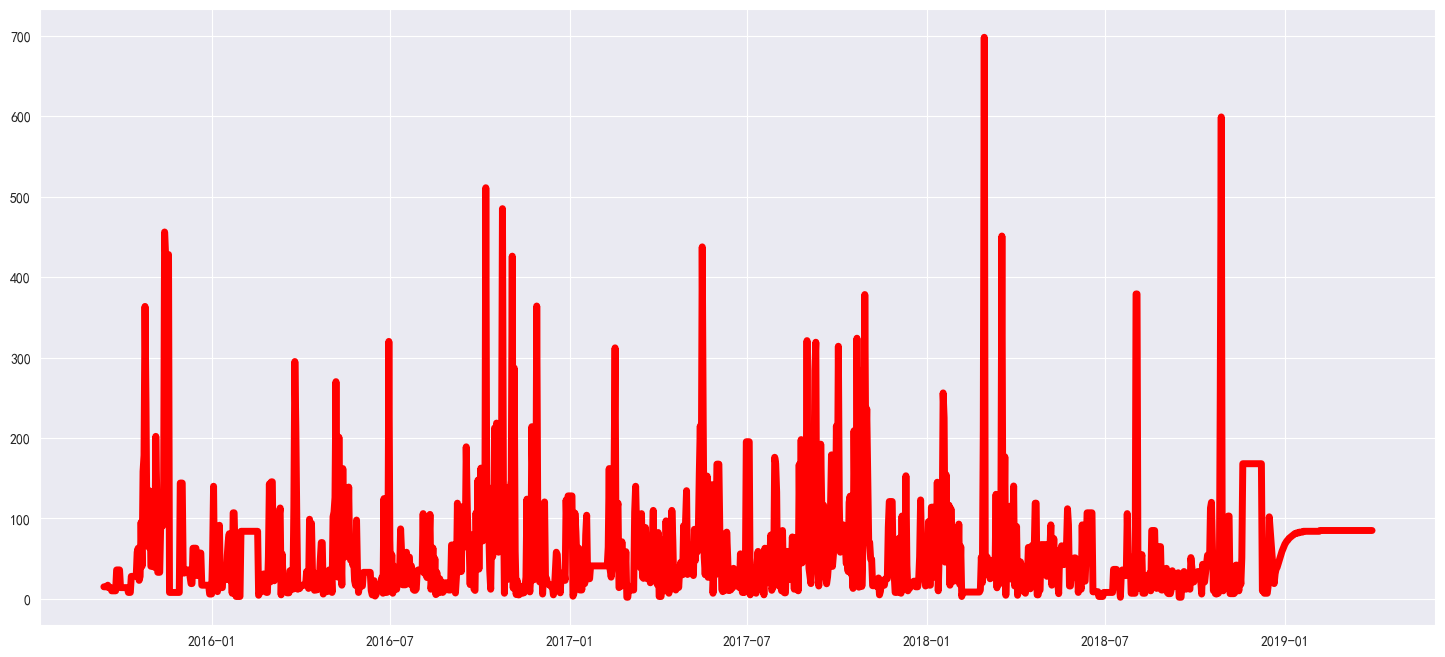

In [40]:
plt.figure(figsize=(18, 8))
plt.plot(df_alldata['ord_qty'], label='商品code：20006按天的订单需求', color='red', linestyle='-',linewidth = '5')

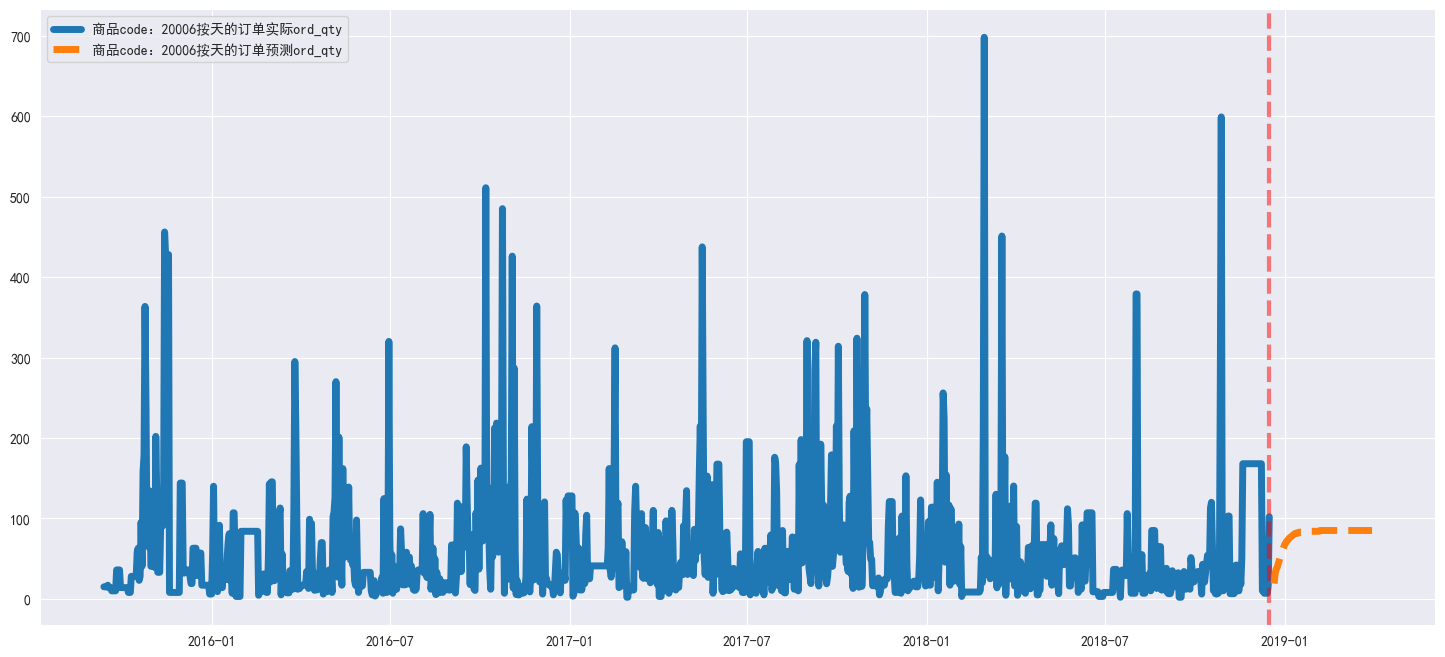

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文字体，如不使用中文字体会出现乱码
plt.rcParams['axes.unicode_minus'] = False # 解决负号'-'显示为方块的问题

def predict_plot(df,data,label):
    plt.figure(figsize=(18, 8))
    plt.plot(df.loc[:,label], label='商品code：20006按天的订单'+'实际'+label,linestyle='-',linewidth = '5')
    plt.axvline(x=df.index[-1], alpha=0.5, c="r", ls="--", lw=3)
    # plt.plot(test['count'], label='Test')
    plt.plot(data[label], label='商品code：20006按天的订单'+'预测'+label,linestyle='--',linewidth = '5')
    plt.legend(loc='best')
    plt.show()

predict_plot(df_train_20006_byday,future,'ord_qty')